In [25]:
!pip install numpy pandas matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [77]:
# Creates a dataframe from our data stored in the .csv file
# Here's a link to my dataset: https://www.kaggle.com/datasets/ivansher/nasa-nearest-earth-objects-1910-2024
neo_df_raw = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [ ]:
# Introduction

In [37]:
# # Shows the column headers & first 5 rows of data
# neo_df_raw.head()

In [33]:
# Some useful information about our data that we can use to fill in null values, or to just get a better feel for our dataset
neo_df_raw.describe()

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance
count,3.381990e+05,338171.000000,338171.000000,338171.000000,338199.000000,3.381990e+05
mean,1.759939e+07,22.932525,0.157812,0.352878,51060.662908,4.153535e+07
std,2.287225e+07,2.911216,0.313885,0.701869,26399.238435,2.077399e+07
min,2.000433e+06,9.250000,0.000511,0.001143,203.346433,6.745533e+03
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.031471,2.494540e+07
50%,3.742127e+06,22.800000,0.073207,0.163697,47560.465474,4.332674e+07
75%,5.405374e+07,25.100000,0.189041,0.422708,66673.820614,5.933961e+07
max,5.446281e+07,33.580000,37.545248,83.953727,291781.106613,7.479865e+07


In [21]:
# # Preprocessing


# For my preprocessing, I started out by outright dropping the null values. I chose to do this instead of filling the data, because I didn't
# want to skew my dataset with data that wasn't something explicitly observed, and combined with the fact that this data set contains over 300,000 entries,
# I thought that the best course of action to take was to only look at data that was complete.

# following this, I extrapolated the data from each entry's minimum and maximum estimated diameter, and took an average of the two for each entry. I 
# thought that this would be a pretty accurate way to represent the size of each Near Earth Object. This isn't a precise size for each object, because
# in more cases than not, the exact diameter of each NEO likely has a pretty wide range in possible diameter.

# I also noticed that within each object's name, the year of discovery was listed, so I looked online to find a Python method that would search each string
# to find a 4-digit integer within the year range of 1910 to 2024 in order to extract that year from each entry's name.
# There is a margin of error in how everything came out, but for the most part, my function worked. In entries where I was unable to
# extract a year within the range of years that this data set is supposed to hold, I decided to drop that data as well. There may be a few entries that
# snuck through with an incorrect year due to the non-consistent naming scheme, but I think that for the purpose of this project, it is pretty accurate.

# I then filtered the data set into two parts, hazardous and non-hazardous, so that we can take a look at each set individually. In addition to this,
# I chose not to include some of the categories in these data frames, such as the min and max estimated diameters, orbiting body, and the neo id.
# my reasoning for each is as follows:
#  - neo_id: seemingly, just another way to keep track of which NEO is which - like a second name
#  - estimated_diameter_min: I'm going to use the averages for each entry that I calculated in lieu of this column
#  - estimated_diameter_max: Same reason as the max
#  - orbiting_body: These are all Near EARTH objects, so there isn't anything here that isn't orbiting Earth.

# I proceeded to work from here on creating some visualizations for my questions at hand.

In [13]:
# Where are our missing/null values? What makes sense to omit, replace with the mean, or should we do something different?
neo_df_raw.isna().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [39]:
# To start with there are 28 entries that lack values for the absolute magnitude (which is the brightness/luminosity of the Near Earth Object), min estimated diameter, and maximum estimated diameter.
# There could be a multitude of reasons why these data sets are left as null, but since we have many many entries in our data set, I'm going to choose to drop the entries with null values.
neo_df = neo_df_raw.dropna()
# neo_df.isna().sum()

In [45]:
# I'm going to define a function to extract the year data from the name of each entry
def year_extract(name):
    # Finds all 4 digit numbers in the name of an object
    # r signifies that the string literal is a raw string,
    # \b indicates a boundary, which is where a non-integer character meets with an integer character
    # \d{4} signifies we're looking for a 4-digit integer
    match = re.findall(r'\b(\d{4})\b', name)
    # An array holding all of the years if they are between 1910 and 2024
    valid_years = [int(year) for year in match if 1910 <= int(year) <= 2024]
    return valid_years[0] if valid_years else None 
    # There may be some amount of error in doing it this way, such as if there are multiple 4-digit numbers within our year range,
    # I'm opting to take the first one found. 


# To ensure we don't break our data set, we're going to make a copy of it, and name it so we remember this will be the one with the year column
neo_df_years = neo_df.copy()
neo_df_years['year'] = neo_df['name'].apply(year_extract)
neo_df_years.head() # to see if it worked

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous,year
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False,1998.0
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True,2008.0
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False,2003.0
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False,2002.0
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False,2011.0


In [41]:
# neo_df_years.isna().sum() # to see if we have any new null values now

In [47]:
#we do have null values, so what we're going to do is drop the entries where we were unable to extract the year data. and then check for nulls
neo_df_years = neo_df_years.dropna()
# neo_df_years.isna().sum()

In [49]:
# It worked! Now lets make a column with the average diameter of each object
neo_df_years['estimated_diameter_average'] = (neo_df_years['estimated_diameter_min'] + neo_df_years['estimated_diameter_max'])/2
neo_df_years.describe() # to see our new column added

,neo_id,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,year,estimated_diameter_average
count,3.381150e+05,338115.000000,338115.000000,338115.000000,338115.000000,3.381150e+05,338115.000000,338115.000000
mean,1.760297e+07,22.933898,0.156483,0.349907,51061.385483,4.153533e+07,2013.865717,0.253195
std,2.287379e+07,2.909221,0.261823,0.585453,26400.103368,2.077465e+07,7.793406,0.423638
min,2.001221e+06,12.520000,0.000511,0.001143,203.346433,6.745533e+03,1915.000000,0.000827
25%,3.373980e+06,20.740000,0.025384,0.056760,30712.914536,2.494374e+07,2009.000000,0.041072
50%,3.742130e+06,22.800000,0.073207,0.163697,47558.915603,4.332765e+07,2016.000000,0.118452
75%,5.405374e+07,25.100000,0.189041,0.422708,66674.011737,5.934101e+07,2020.000000,0.305874
max,5.446281e+07,33.580000,8.328273,18.622586,291781.106613,7.479865e+07,2024.000000,13.475430


In [23]:
# This graph difficult to parse on the eyes between hazardous and non hazardous
# It could be useful to show where the majority of the dangerous diameters are, maybe look at this with the average diameter
# sns.set(rc={"figure.figsize":(20,12)})
# sns.lineplot(data=neo_df_years, x='estimated_diameter_min', y='relative_velocity', hue='is_hazardous')

In [51]:
# Filter data to only hazardous neos
neo_df_hazardous = neo_df_years[neo_df_years['is_hazardous']==True]

# There's a lot of data in our set that we aren't going to use for this, so we're not going to include these columns: 
# neo_id, orbiting body, est. diameters for min & max, and we've already filtered to hazardous only
data = {
    'name': neo_df_hazardous['name'],
    'year': neo_df_hazardous['year'],
    'estimated_diameter_avg': neo_df_hazardous['estimated_diameter_average'],
    'relative_velocity': neo_df_hazardous['relative_velocity'],
    'miss_distance': neo_df_hazardous['miss_distance'],
    'year_discovered': neo_df_hazardous['year']
}
hazardous_filtered_df = pd.DataFrame(data)

In [53]:
# This shows we have about 40k entries left in our data set - pretty substantial!
hazardous_filtered_df.describe()


,year,estimated_diameter_avg,relative_velocity,miss_distance,year_discovered
count,43142.000000,43142.000000,43142.000000,4.314200e+04,43142.000000
mean,2008.720736,0.473713,63973.824893,4.118257e+07,2008.720736
std,9.012216,0.479128,27750.356978,2.083593e+07,9.012216
min,1932.000000,0.133519,3888.602813,7.530330e+04,1932.000000
25%,2003.000000,0.229902,43602.997662,2.338613e+07,2003.000000
50%,2009.000000,0.323253,59972.083325,4.255407e+07,2009.000000
75%,2015.000000,0.512322,80440.472432,5.938026e+07,2015.000000
max,2024.000000,6.509425,194676.462159,7.479666e+07,2024.000000


In [67]:
# Visualization Average Size vs Year Discovered
# From this graph, we can see a relationship between the average diameter of each NEO and the year it was discovered. 
# As time passed, and with the improvements in technology, we were able to discover smaller, and smaller objects near Earth, and in the early 1980's
# there seemed to be a substantial increase in not only the amount of NEO's discovered, but also an decrease in the average diameter of the NEO's
# that we were able to spot. One of the biggest (and well known) factors in the recent increase in discoveries is likely the Hubble Telescope, which was launched in 1990.

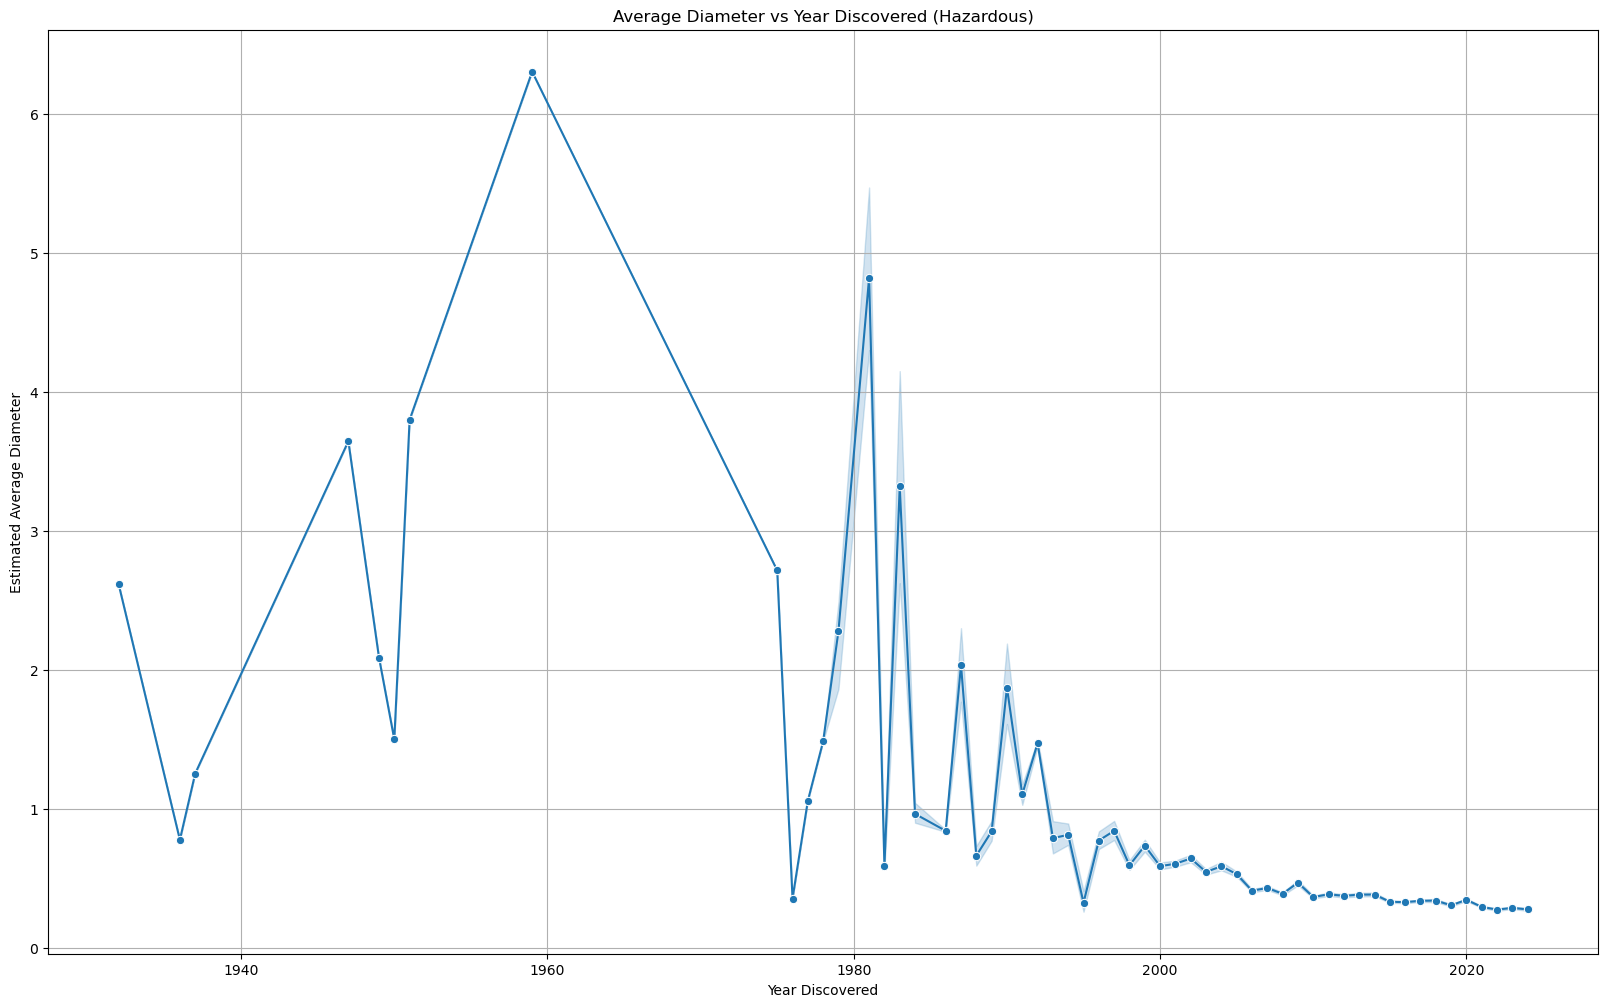

In [59]:
plt.figure(figsize=(20,12))
sns.lineplot(data=hazardous_filtered_df, x='year_discovered', y='estimated_diameter_avg', marker='o')
plt.title('Average Diameter vs Year Discovered (Hazardous)')
plt.xlabel('Year Discovered')
plt.ylabel('Estimated Average Diameter')
plt.grid(True)
plt.show()

In [57]:
# Filter data to only nonhazardous neos
neo_df_nonhazardous = neo_df_years[neo_df_years['is_hazardous']==False]

# There's a lot of data in our set that we aren't going to use for this, so we're not going to include these columns: 
# neo_id, orbiting body, est. diameters for min & max, and we've already filtered to hazardous only
data = {
    'name': neo_df_nonhazardous['name'],
    'year': neo_df_nonhazardous['year'],
    'estimated_diameter_avg': neo_df_nonhazardous['estimated_diameter_average'],
    'relative_velocity': neo_df_nonhazardous['relative_velocity'],
    'miss_distance': neo_df_nonhazardous['miss_distance'],
    'year_discovered': neo_df_nonhazardous['year']
}
nonhazardous_filtered_df = pd.DataFrame(data)

In [63]:
# This shows we have about 295k entries left in our data set - That's a lot!
nonhazardous_filtered_df.describe()

,year,estimated_diameter_avg,relative_velocity,miss_distance,year_discovered
count,294973.000000,294973.000000,294973.000000,2.949730e+05,294973.000000
mean,2014.618209,0.220943,49172.844969,4.158692e+07,2014.618209
std,7.300949,0.404958,25657.782490,2.076520e+07,7.300949
min,1915.000000,0.000827,203.346433,6.745533e+03,1915.000000
25%,2010.000000,0.035281,29339.303254,2.518303e+07,2010.000000
50%,2016.000000,0.090270,45694.761077,4.344175e+07,2016.000000
75%,2020.000000,0.247481,64536.461442,5.933565e+07,2020.000000
max,2024.000000,13.475430,291781.106613,7.479865e+07,2024.000000


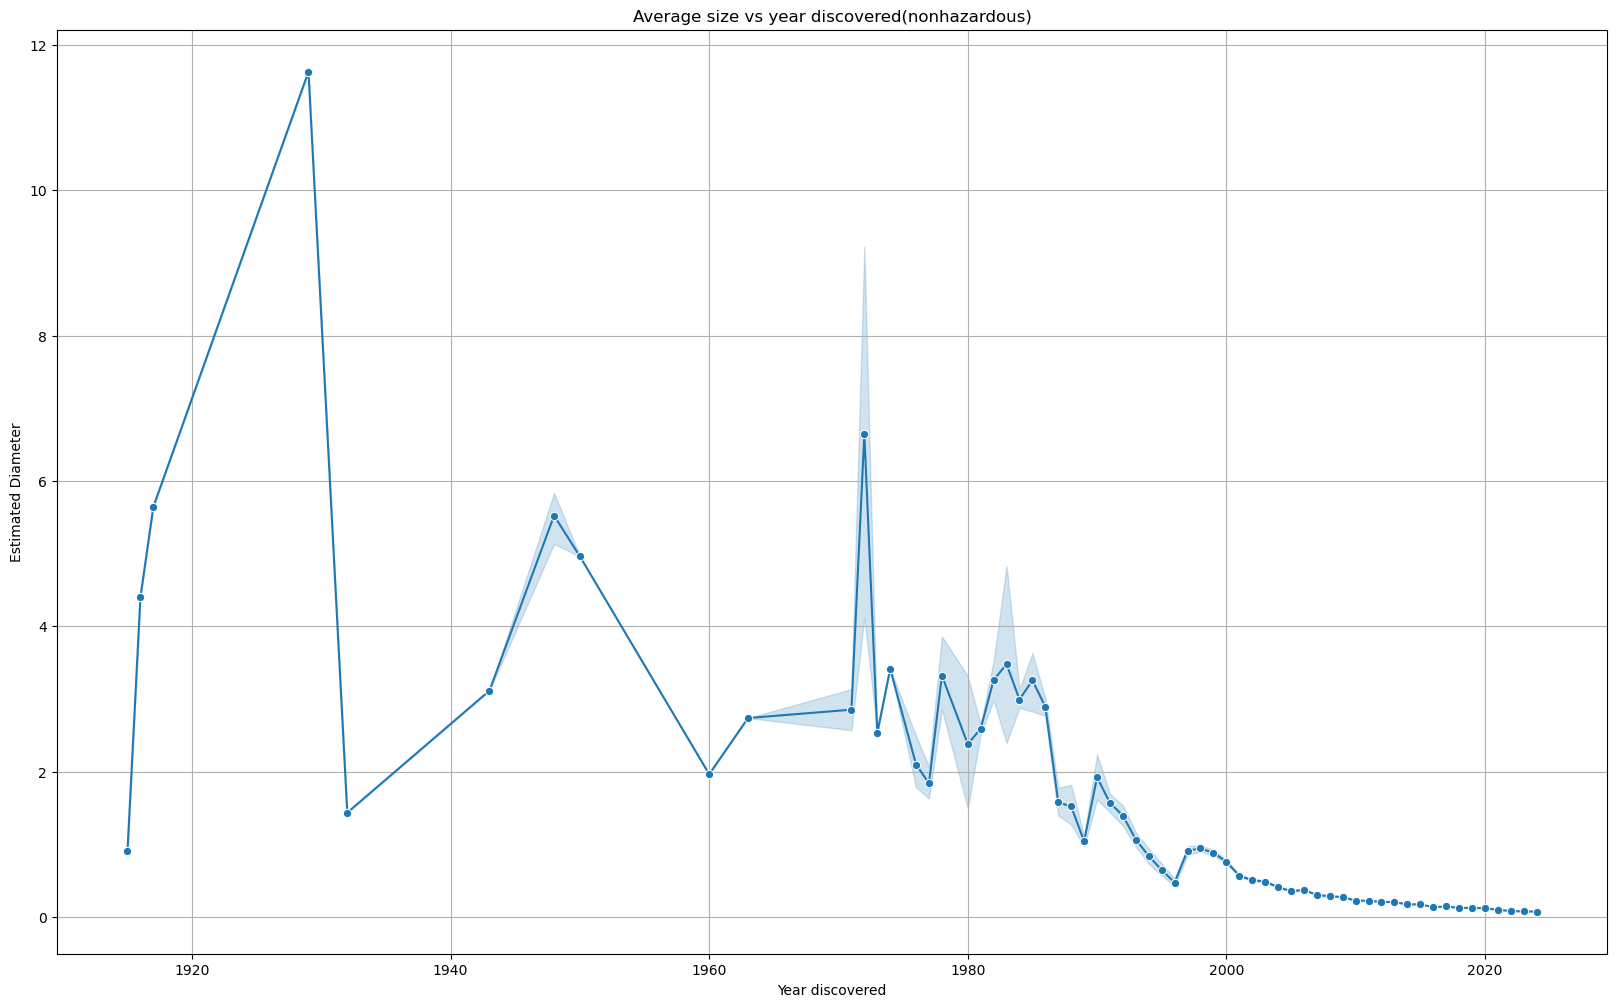

In [67]:
plt.figure(figsize=(20,12))
sns.lineplot(data=nonhazardous_filtered_df, x='year_discovered', y='estimated_diameter_avg', marker='o')
plt.title('Average size vs year Discovered(nonhazardous)')
plt.xlabel('Year Discovered')
plt.ylabel('Estimated Average Diameter')
plt.grid(True)
plt.show()

In [75]:
# Absolute Magnitude vs Year Discovered
# At a glance, this graph could be a bit misleading, but makes perfect sense with a couple of definitions, and a better understanding of how
# absolute magnitude works. Absolute Magnitude is a measurement of how luminous (the apparent brightness) an object is were it to be seen from
# about 10 parsecs (about 32.6 light-years) away from the observer. The graph itself is misleading at a glance, because in fact, a higher number does
# not mean the object is brighter. In fact, it means the exact opposite of that. The higher an object's absolute magnitude, the dimmer the object is.
# So as we can see below, there is a massive up-trend after 1980 (especially so after 1990) in the amount of objects that have been discovered
# that are very dim! This can be attributed to, once again, the massive leaps and bounds in telescope development in the last 4 decades.

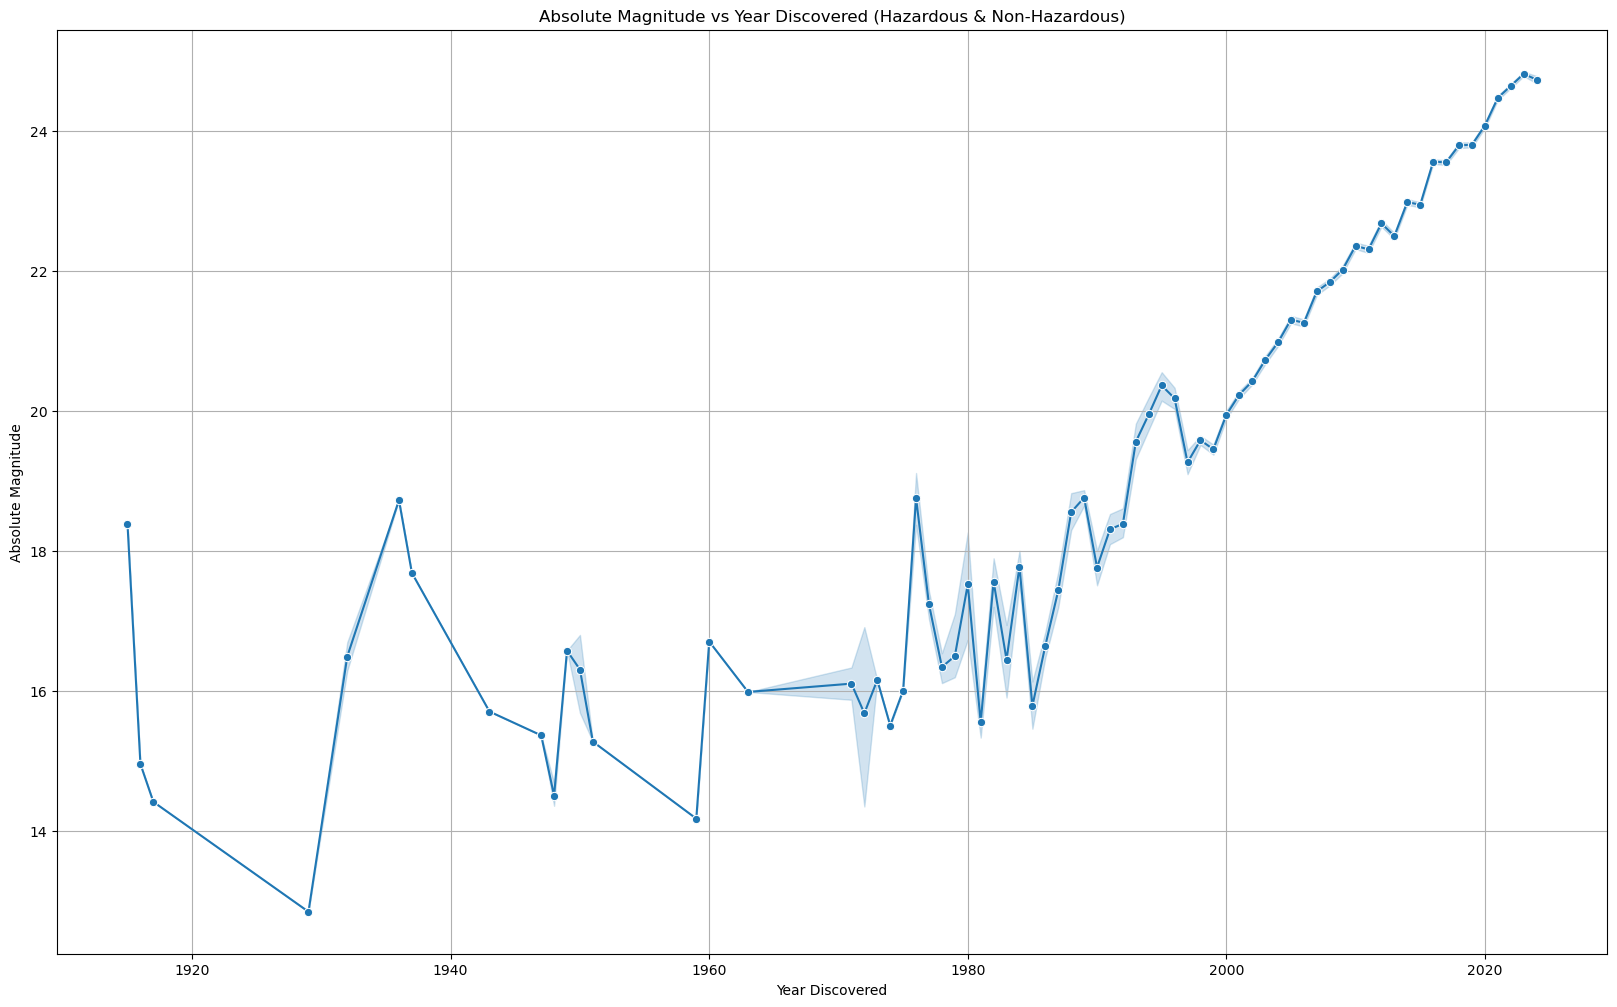

In [71]:
plt.figure(figsize=(20,12))
sns.lineplot(data=neo_df_years, x='year', y='absolute_magnitude', marker='o')
plt.title('Absolute Magnitude vs Year Discovered (Hazardous & Non-Hazardous)')
plt.xlabel('Year Discovered')
plt.ylabel('Absolute Magnitude')
plt.grid(True)
plt.show()